# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [1]:
# Please include your imports in this cell
import numpy as np
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD ##needs to be changed to keras


from scikeras.wrappers import KerasClassifier

import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data loading, exploration, and preprocessing

## Data loading

In [2]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

## Data exploration

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13673, 28, 28, 3)
(3419, 28, 28, 3)
(13673,)
(3419,)


In [4]:
X_train.dtype

dtype('uint8')

In [5]:
y_train.dtype

dtype('uint8')

In [6]:
unique_values, unique_indices = np.unique(y_train, return_index=True)
sorted_arr = y_train[unique_indices]
print(sorted_arr)

[0 1 2 3 4 5 6 7]


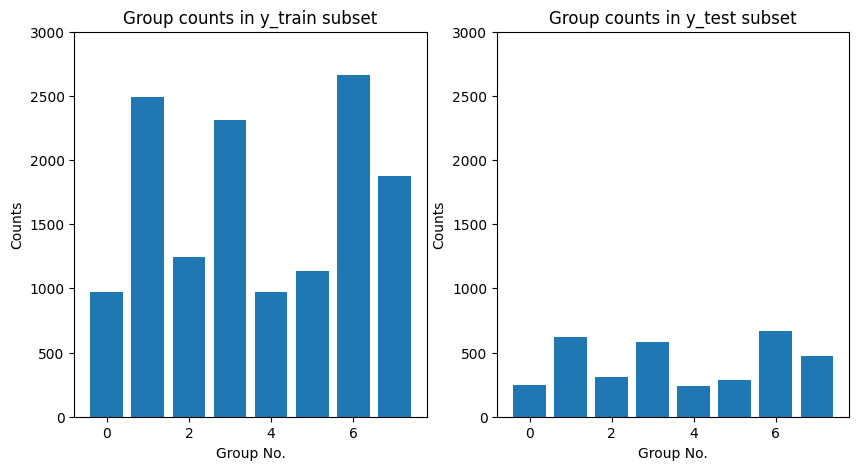

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_train, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

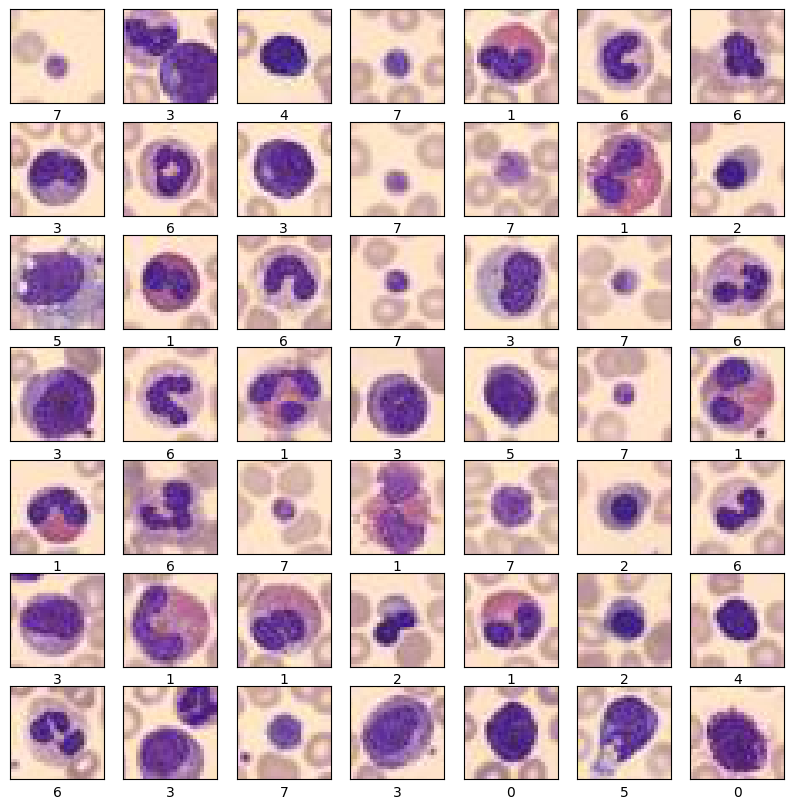

In [8]:
class_names = sorted_arr

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

## Preprocessing

In [9]:
#Normalizing
X_train_n = X_train /255
X_test_n = X_test /255

In [10]:
#Catagorizing
num_classes = 8
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

In [11]:
X_train_r =  np.reshape(X_train, (X_train.shape[0], -1))
X_test_r = np.reshape(X_test, (X_test.shape[0], -1))

X_train_r_n =  X_train_r/255.0
X_test_r_n = X_test_r/255.0

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

In [12]:
print("X_train normalized",X_train_n[0])
print("X_train reshaped and normalized", X_test_r_n[0])
print("y_train with catagorized", y_test_c[0])

X_train normalized [[[0.89019608 0.76470588 0.77647059]
  [0.87058824 0.74509804 0.74901961]
  [0.90196078 0.78039216 0.76078431]
  ...
  [0.94901961 0.84705882 0.74117647]
  [0.97254902 0.87058824 0.76470588]
  [0.99607843 0.89411765 0.78823529]]

 [[0.89803922 0.77647059 0.76470588]
  [0.87843137 0.75686275 0.7372549 ]
  [0.90588235 0.78823529 0.74901961]
  ...
  [0.98039216 0.87843137 0.77254902]
  [0.98823529 0.88627451 0.78039216]
  [0.99607843 0.89411765 0.78823529]]

 [[0.91372549 0.8        0.74509804]
  [0.89803922 0.78431373 0.72156863]
  [0.91372549 0.8        0.72941176]
  ...
  [1.         0.90196078 0.79607843]
  [0.99215686 0.89019608 0.78431373]
  [0.98431373 0.88235294 0.77647059]]

 ...

 [[1.         0.89411765 0.80784314]
  [1.         0.90980392 0.82352941]
  [1.         0.90980392 0.82352941]
  ...
  [0.88235294 0.77254902 0.67843137]
  [0.85098039 0.74117647 0.65490196]
  [0.84313725 0.73333333 0.65098039]]

 [[1.         0.89411765 0.8       ]
  [1.         0.89

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

In [13]:
def create_MLPmodel(neurons, dropout_rate, activation,):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 3]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics= ['categorical_accuracy'])

    return model

## Model 2 - Convolutional Neural Network

In [14]:
def create_ConVmodel(activation):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train_n.shape[1:],activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024,kernel_regularizer=l2(0.01), activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['categorical_accuracy'])
    return model

## Model 3 - Algorithm Choice 1

In [15]:
#SVM
def create_svc():
    model_svc = SVC(**kwargs)
    results = model_svc.fit(X_train_r_n, y_train)
    return results

## Model 4 - Algorithm Choice 2

In [16]:
def create_rf():
    model_rf = RandomForestClassifier(**kwargs)
    results = model_rf .fit(X_train_r_n, y_test)
    return results

# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

In [18]:
def create_MLPmodel(neurons, dropout_rate, activation):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 3]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics= ['categorical_accuracy'])

    return model

model_mlp = KerasClassifier(model=create_MLPmodel,verbose=0)

neurons = [128, 64, 32]
dropout_rate = [0.01,0.05,0.1]
activation = ['relu']

optimizer = ['Adam', 'SGD']
batch_size = [32,64]
epochs = [20]
param_grid = dict(model__neurons=neurons, 
                    model__dropout_rate=dropout_rate,
                    model__activation=activation,
                    batch_size = batch_size,
                    epochs = epochs
                  )

grid = GridSearchCV(estimator=model_mlp, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.788270 using {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 64}
0.784025 (0.016517) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 128}
0.788270 (0.020623) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 64}
0.744169 (0.026431) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 32}
0.769034 (0.015908) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.05, 'model__neurons': 128}
0.764498 (0.016591) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.05, 'model__neurons': 64}
0.632932 (0.127713) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.05, 'model__neurons': 32}
0.733487 (0.028665) with: {'ba

## Model 2 - Convolutional Neural Network

In [22]:
def create_ConVmodel(activation):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train_n.shape[1:],activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(1024,kernel_regularizer=l2(0.01), activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['categorical_accuracy'])
    return model

model_conv = KerasClassifier(model=create_ConVmodel,verbose=0)

batch_size = [32, 64]
epochs = [20]
activation = ['relu', 'tanh']
param_grid = dict(batch_size = batch_size,
                epochs = epochs,
                model__activation=activation
                  )

num_classes = 8

# history_cnn = model_conv.fit(X_train_n, y_train_c,batch_size=batch_size,epochs=epochs,validation_data=(X_test_n, y_test_c),shuffle=True,
#                     )
grid = GridSearchCV(estimator=model_conv, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892270 using {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu'}
0.892270 (0.012371) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu'}
0.776716 (0.088536) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'tanh'}
0.678135 (0.211678) with: {'batch_size': 64, 'epochs': 20, 'model__activation': 'relu'}
0.764344 (0.098845) with: {'batch_size': 64, 'epochs': 20, 'model__activation': 'tanh'}


## Model 3 - Algorithm Choice 1

In [23]:
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train_r_n,y_train,test_size=0.8)
print(X_train_part.shape)
print(y_train_part.shape)
print(X_test_part)
print(y_test_part)

(2734, 2352)
(2734,)
[[0.98823529 0.89019608 0.77254902 ... 1.         0.89019608 0.80392157]
 [0.56470588 0.48627451 0.67843137 ... 0.8627451  0.81960784 0.84313725]
 [0.77254902 0.62352941 0.68235294 ... 0.77647059 0.62352941 0.59607843]
 ...
 [0.94901961 0.83529412 0.67843137 ... 0.97647059 0.86666667 0.78431373]
 [0.85490196 0.68627451 0.65098039 ... 0.96862745 0.83921569 0.77254902]
 [0.84313725 0.67843137 0.59215686 ... 0.98431373 0.88235294 0.79215686]]
[2 3 3 ... 6 6 7]


In [24]:

model_svc = SVC(random_state=2023)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_part, y_train_part)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.819307 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.777976 (0.011299) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.653984 (0.005266) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.785291 (0.012193) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.198610 (0.000103) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.777976 (0.011299) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.309438 (0.001932) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.211776 (0.002593) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
0.198610 (0.000103) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.777976 (0.011299) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
0.357717 (0.004685) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.545348 (0.014549) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.198610 (0.000103) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.777976 (0.011299) with: {'C': 0.1, 'gamma': 0.01, 'kerne

## Model 4 - Algorithm Choice 2

In [25]:
##Random forest ensemble method

model_rf = RandomForestClassifier(random_state=2023)


max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

param_grid = dict(
    max_features = max_features,
    criterion = criterion
)

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_r_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.621444 using {'criterion': 'entropy', 'max_features': 'sqrt'}
nan (nan) with: {'criterion': 'gini', 'max_features': 'auto'}
0.612448 (0.005992) with: {'criterion': 'gini', 'max_features': 'sqrt'}
0.560814 (0.004467) with: {'criterion': 'gini', 'max_features': 'log2'}
nan (nan) with: {'criterion': 'entropy', 'max_features': 'auto'}
0.621444 (0.005832) with: {'criterion': 'entropy', 'max_features': 'sqrt'}
0.572516 (0.006066) with: {'criterion': 'entropy', 'max_features': 'log2'}


# Final Models

## Model 1 - Fully Connected Neural Network

In [26]:
def create_MLPmodel(neurons, dropout_rate, activation,):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 3]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics= ['accuracy'])

    return model

model_mlp = create_MLPmodel(256, 0.05, 'relu')
history = model_mlp.fit(X_train_n, y_train_c, batch_size = 32, epochs = 100, validation_data =  (X_test_n, y_test_c), shuffle = True)


Epoch 1/100
428/428 [==============================] - 2s 3ms/step - loss: 1.2780 - accuracy: 0.5098 - val_loss: 0.9374 - val_accuracy: 0.6429
Epoch 2/100
428/428 [==============================] - 1s 2ms/step - loss: 0.9128 - accuracy: 0.6504 - val_loss: 0.8335 - val_accuracy: 0.6751
Epoch 3/100
428/428 [==============================] - 1s 2ms/step - loss: 0.8611 - accuracy: 0.6773 - val_loss: 0.7499 - val_accuracy: 0.7207
Epoch 4/100
428/428 [==============================] - 1s 2ms/step - loss: 0.8081 - accuracy: 0.6952 - val_loss: 0.8294 - val_accuracy: 0.6876
Epoch 5/100
428/428 [==============================] - 1s 2ms/step - loss: 0.7598 - accuracy: 0.7173 - val_loss: 0.6813 - val_accuracy: 0.7397
Epoch 6/100
428/428 [==============================] - 1s 2ms/step - loss: 0.7114 - accuracy: 0.7350 - val_loss: 0.6597 - val_accuracy: 0.7561
Epoch 7/100
428/428 [==============================] - 1s 2ms/step - loss: 0.7103 - accuracy: 0.7378 - val_loss: 0.6505 - val_accuracy: 0.7613

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


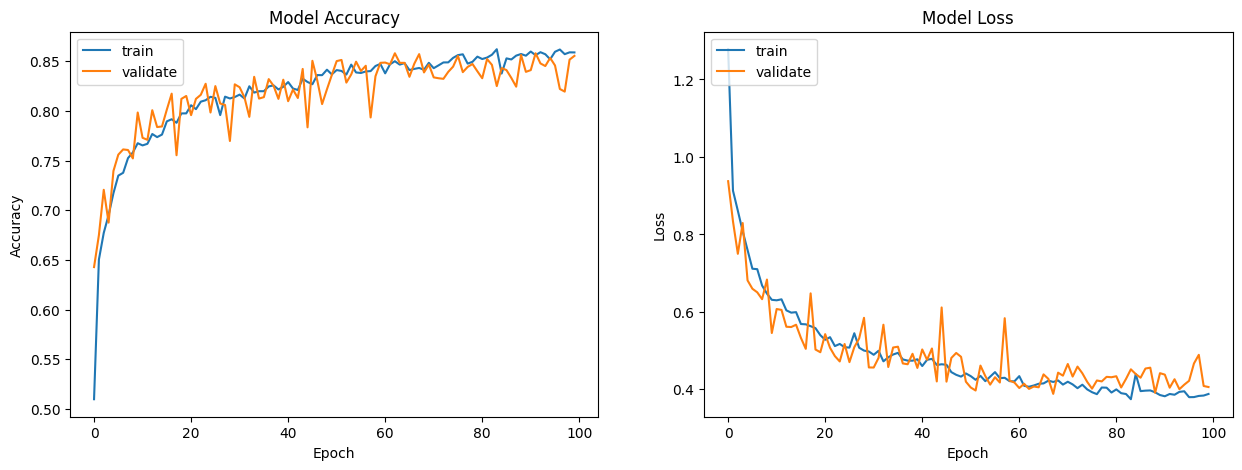

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       244
           1       0.95      0.96      0.95       623
           2       0.94      0.84      0.89       310
           3       0.75      0.68      0.71       579
           4       0.76      0.84      0.80       243
           5       0.67      0.80      0.73       284
           6       0.91      0.92      0.92       666
           7       0.98      1.00      0.99       470

    accuracy                           0.86      3419
   macro avg       0.83      0.84      0.83      3419
weighted avg       0.86      0.86      0.86      3419



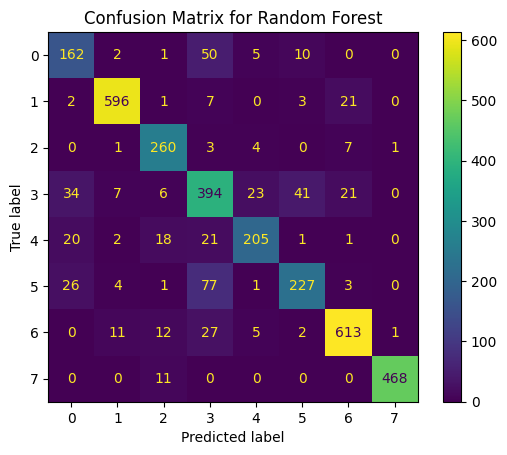

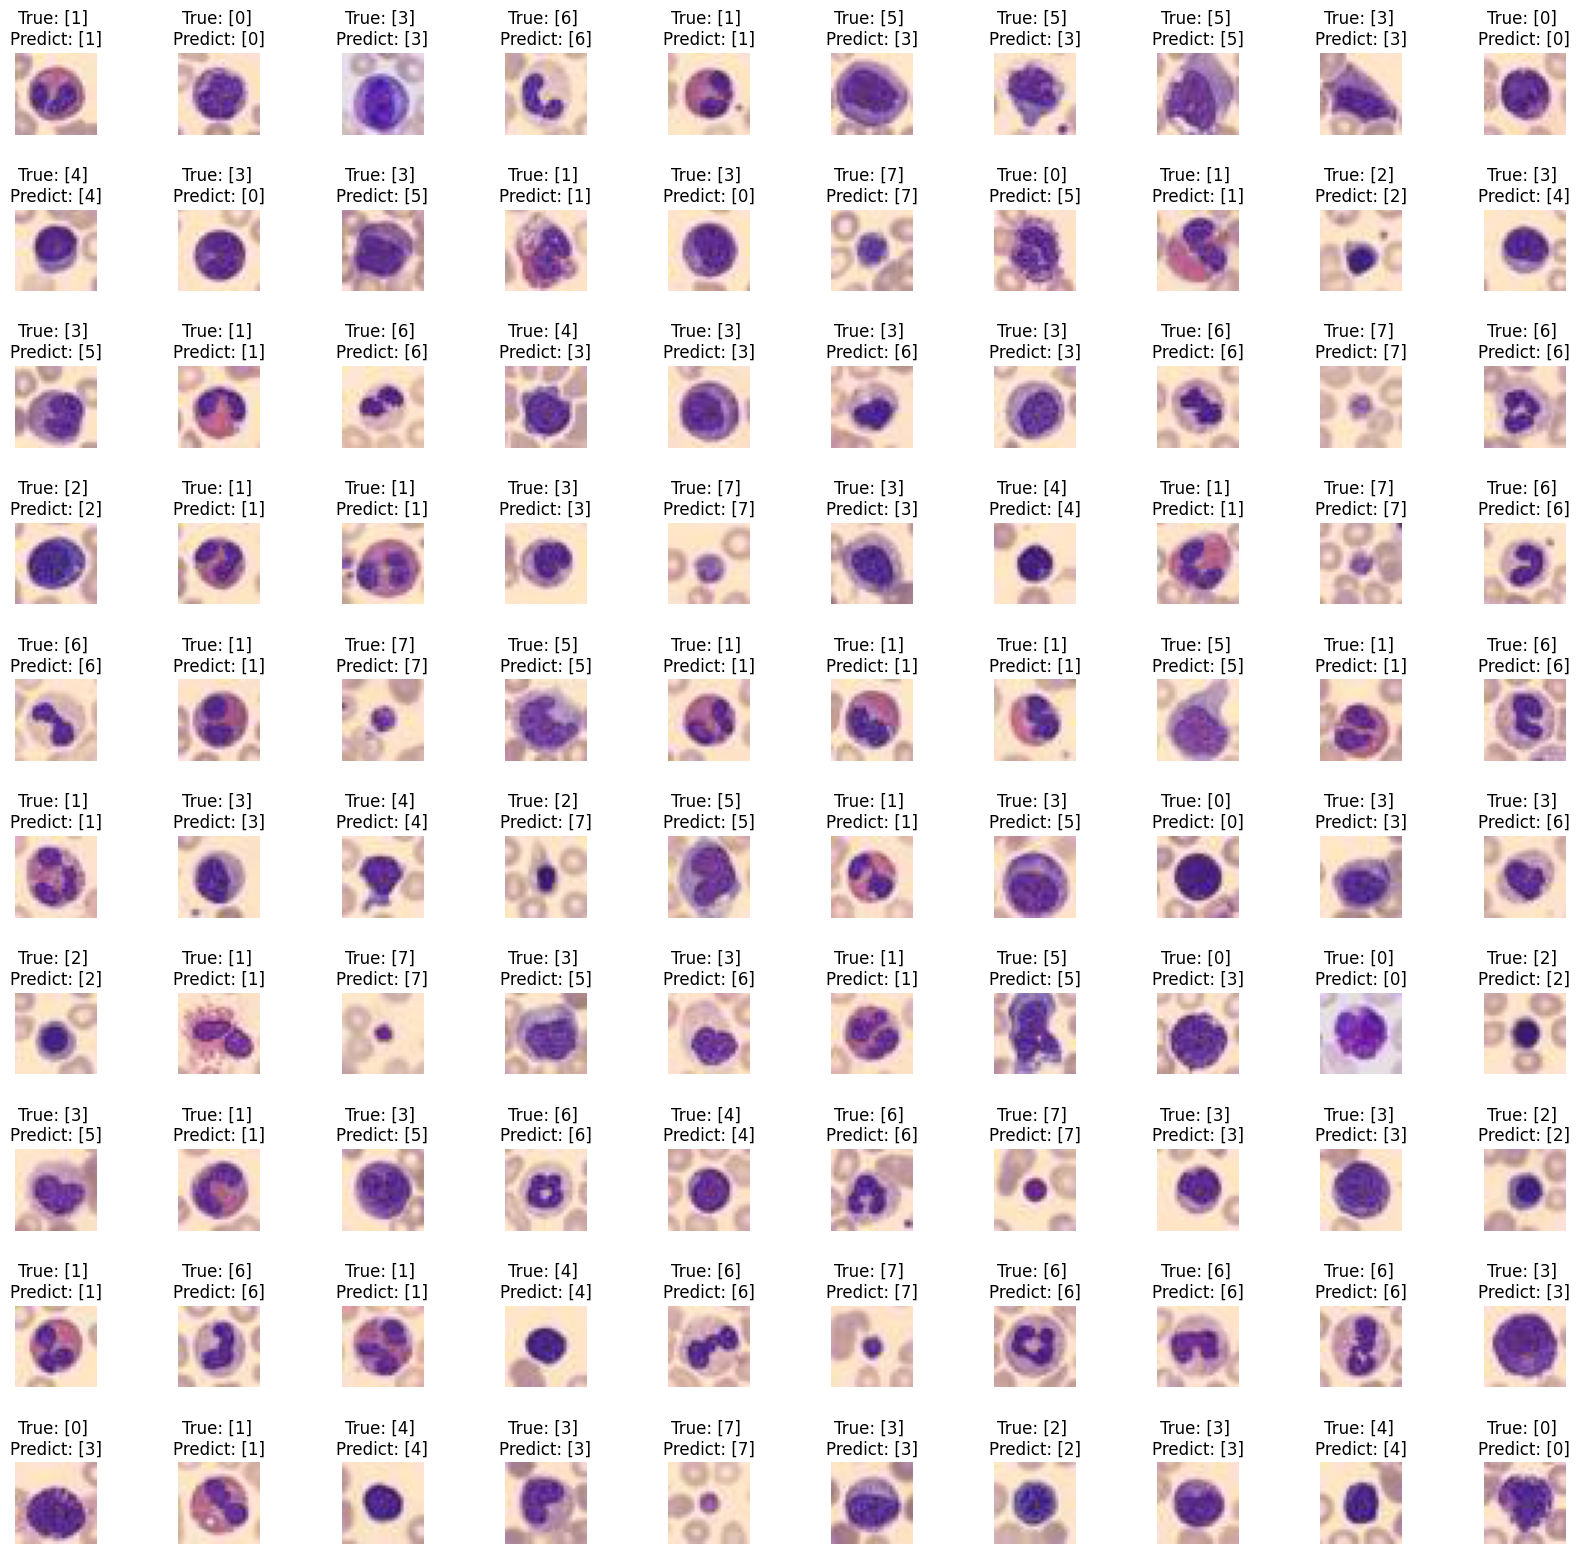

In [27]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

y_pred_mlp = model_mlp.predict(X_test_n)
Y_Pred_mlp = np.argmax(y_pred_mlp, axis=1)
Y_True = np.argmax(y_test_c, axis=1)
print(classification_report(Y_True, Y_Pred_mlp))

cm = confusion_matrix(Y_Pred_mlp,Y_True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_True[i]], [Y_Pred_mlp[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Model 2 - Convolutional Neural Network

In [28]:
def create_ConVmodel(activation):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train_n.shape[1:],activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(1024,kernel_regularizer=l2(0.01), activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['accuracy'])
    return model

model_conv = create_ConVmodel('relu')
history = model_conv.fit(X_train_n, y_train_c, batch_size = 32, epochs = 100, validation_data = (X_test_n, y_test_c), shuffle = True)



Epoch 1/100
428/428 [==============================] - 6s 12ms/step - loss: 6.3738 - accuracy: 0.7168 - val_loss: 4.2937 - val_accuracy: 0.4987
Epoch 2/100
428/428 [==============================] - 5s 11ms/step - loss: 1.4272 - accuracy: 0.8199 - val_loss: 1.4600 - val_accuracy: 0.7751
Epoch 3/100
428/428 [==============================] - 4s 10ms/step - loss: 1.0994 - accuracy: 0.8547 - val_loss: 1.3111 - val_accuracy: 0.7909
Epoch 4/100
428/428 [==============================] - 4s 10ms/step - loss: 0.9655 - accuracy: 0.8734 - val_loss: 1.0114 - val_accuracy: 0.8546
Epoch 5/100
428/428 [==============================] - 4s 10ms/step - loss: 0.7628 - accuracy: 0.8925 - val_loss: 0.7359 - val_accuracy: 0.8766
Epoch 6/100
428/428 [==============================] - 4s 10ms/step - loss: 0.6769 - accuracy: 0.9029 - val_loss: 1.0899 - val_accuracy: 0.7760
Epoch 7/100
428/428 [==============================] - 4s 10ms/step - loss: 0.6856 - accuracy: 0.9060 - val_loss: 1.7191 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


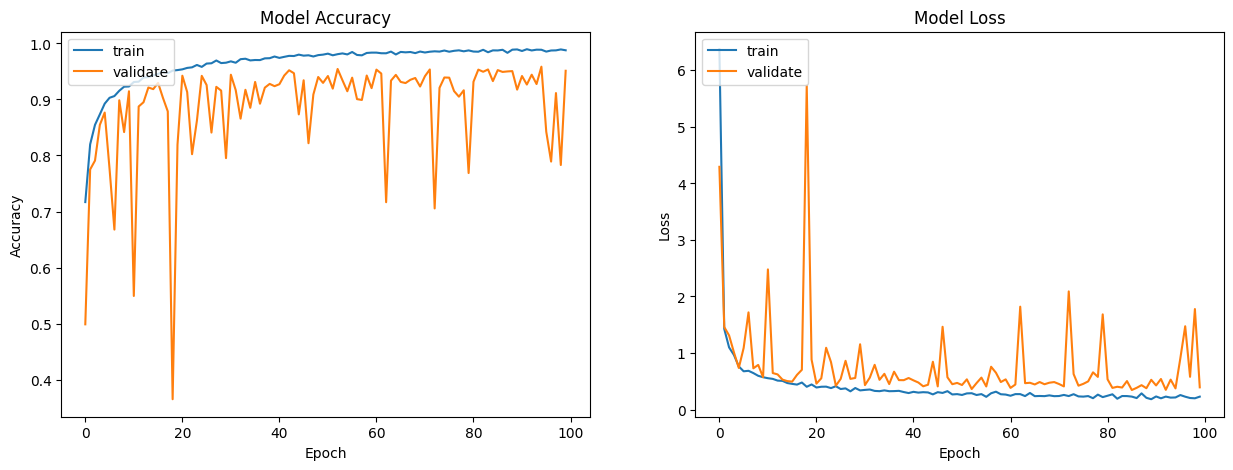

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       244
           1       0.99      0.99      0.99       623
           2       0.98      0.95      0.97       310
           3       0.95      0.84      0.89       579
           4       0.92      0.98      0.95       243
           5       0.81      0.95      0.87       284
           6       0.95      0.99      0.97       666
           7       1.00      1.00      1.00       470

    accuracy                           0.95      3419
   macro avg       0.94      0.95      0.94      3419
weighted avg       0.95      0.95      0.95      3419



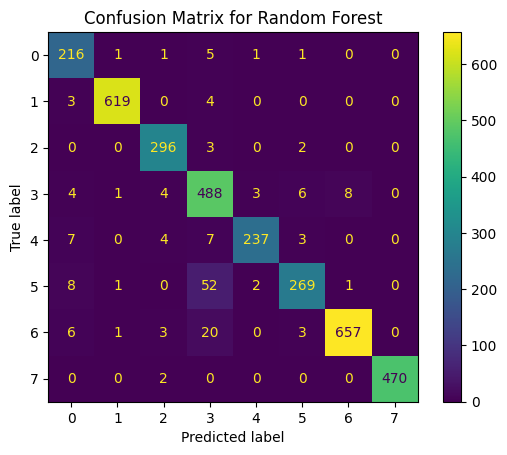

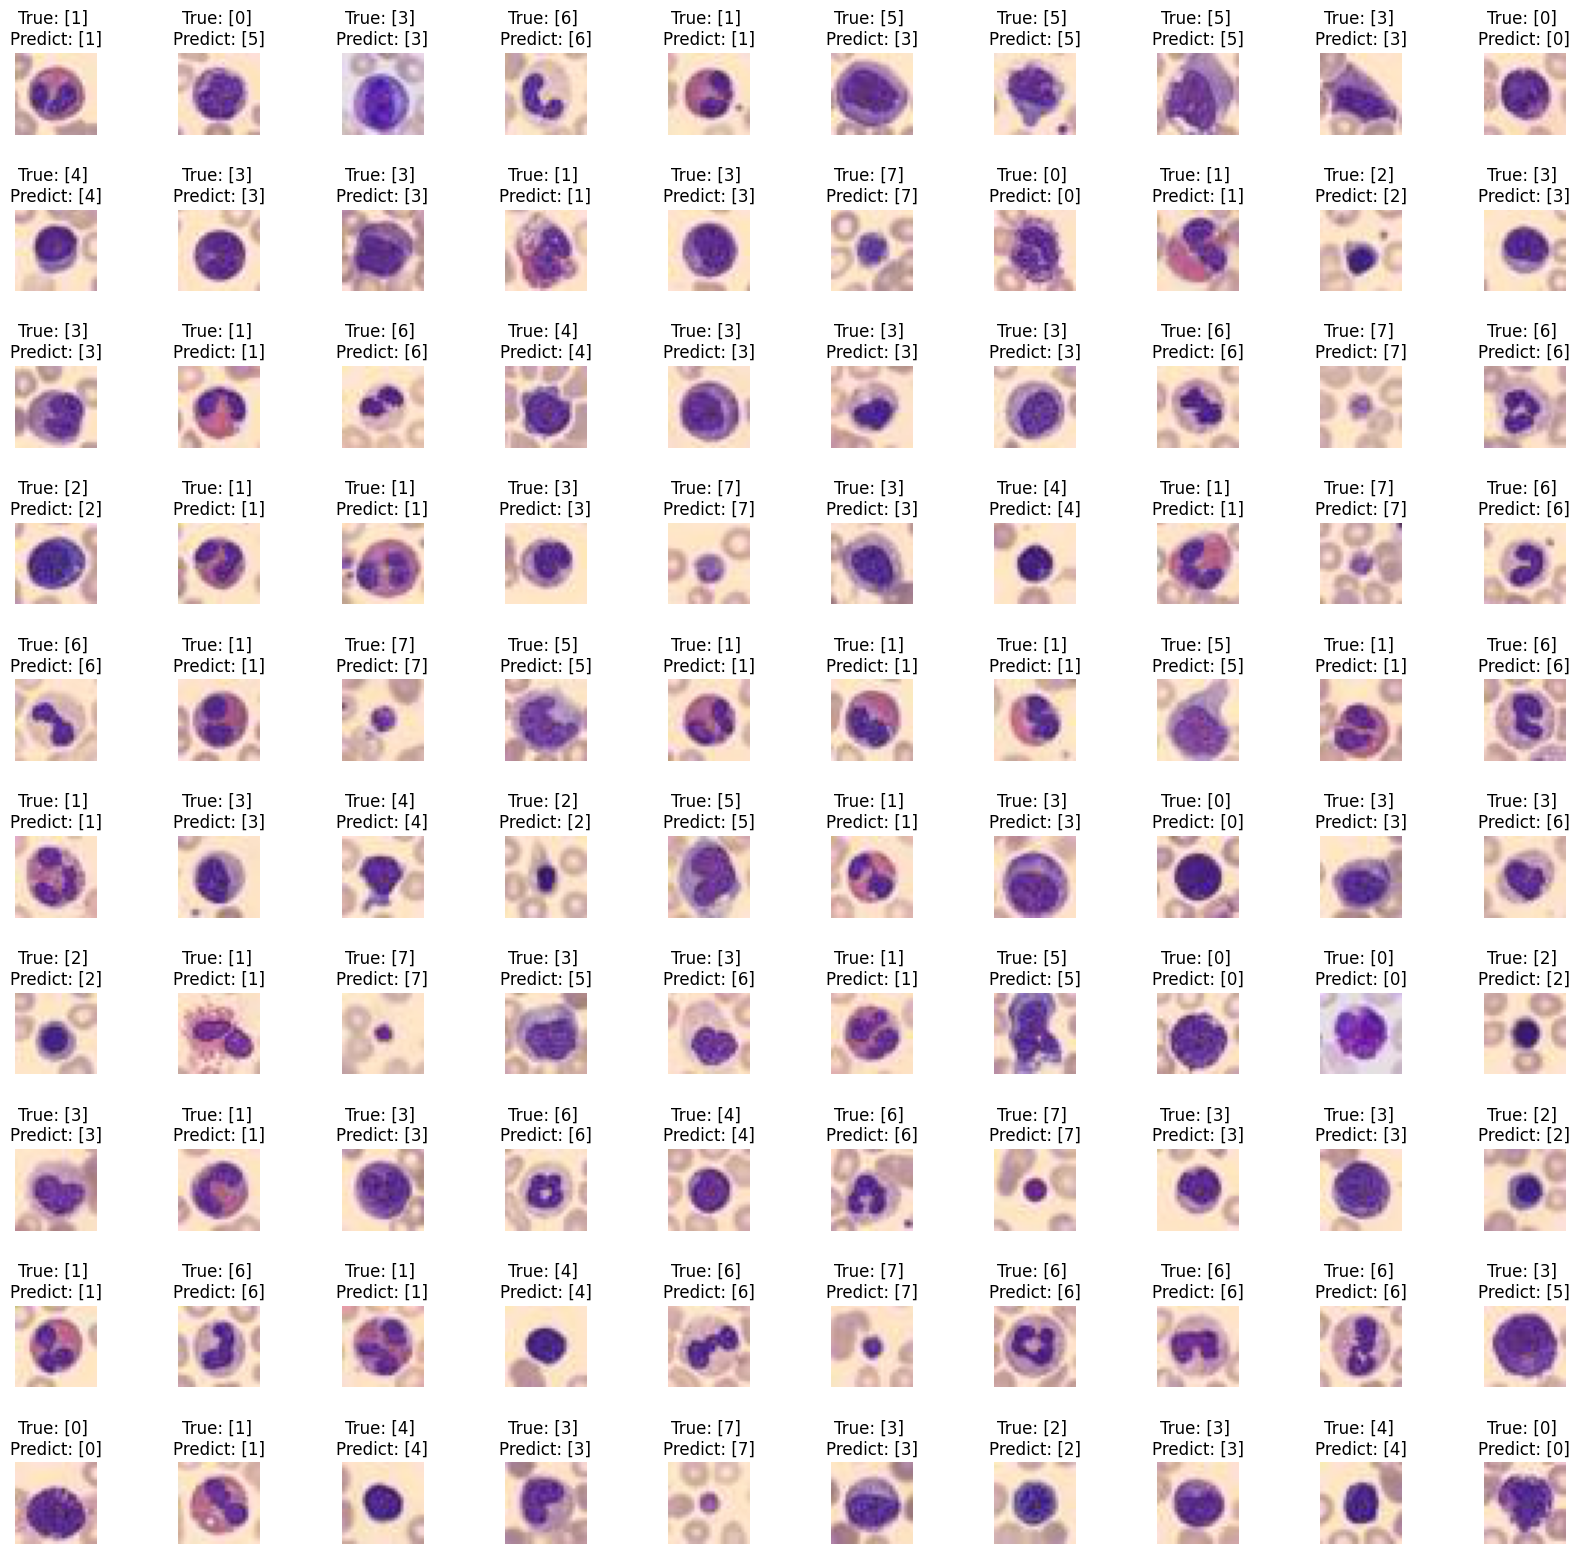

In [29]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

y_pred_conv = model_conv.predict(X_test_n)
Y_Pred_conv = np.argmax(y_pred_conv, axis=1)
Y_True = np.argmax(y_test_c, axis=1)
print(classification_report(Y_True, Y_Pred_conv))
cm = confusion_matrix(Y_Pred_conv,Y_True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_True[i]], [Y_Pred_conv[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Model 3 - Algorithm Choice 1

In [30]:
model_svc = SVC(C=10, gamma='scale', kernel='rbf')
model_svc.fit(X_train_r_n, y_train)

SVC(C=10)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       233
           1       0.97      0.97      0.97       621
           2       0.91      0.93      0.92       303
           3       0.84      0.76      0.80       640
           4       0.83      0.90      0.86       225
           5       0.79      0.86      0.82       263
           6       0.94      0.94      0.94       664
           7       1.00      1.00      1.00       470

    accuracy                           0.90      3419
   macro avg       0.88      0.89      0.88      3419
weighted avg       0.90      0.90      0.90      3419



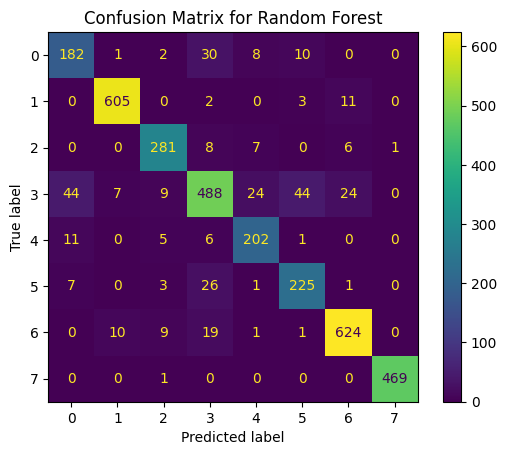

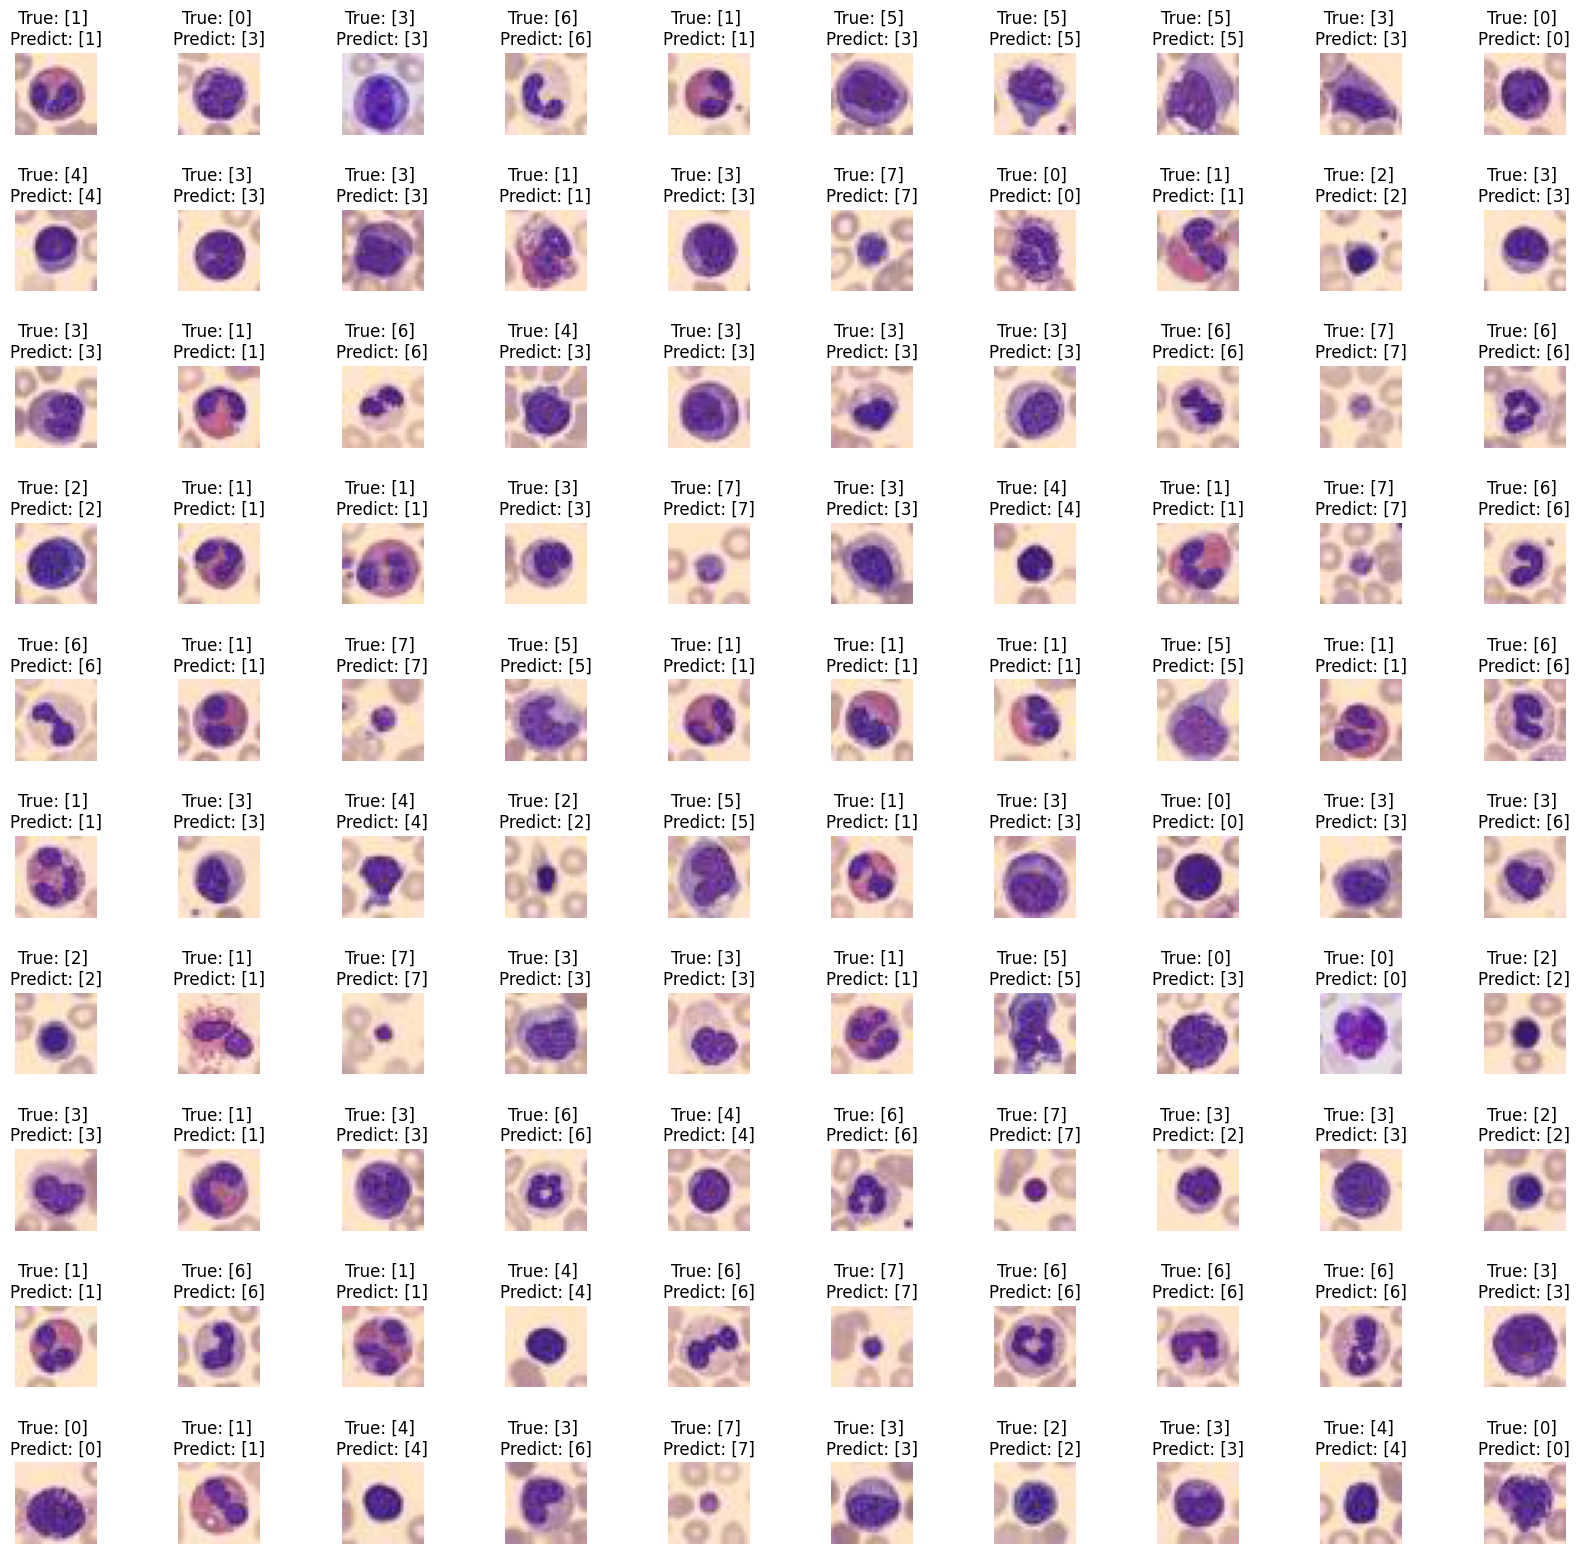

In [31]:
y_pred_svc = model_svc.predict(X_test_r_n)
accuracy_score(y_pred_svc,y_test)
print(classification_report(y_pred_svc,y_test))
cm = confusion_matrix(y_pred_svc,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([y_test[i]], [y_pred_svc[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Model 4 - Algorithm Choice 2

In [32]:
model_rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', random_state=2023)
model_rf.fit(X_train_r_n, y_train)

RandomForestClassifier(criterion='entropy', random_state=2023)

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       170
           1       0.94      0.90      0.92       648
           2       0.82      0.91      0.86       278
           3       0.80      0.67      0.73       691
           4       0.81      0.82      0.82       240
           5       0.57      0.81      0.67       200
           6       0.94      0.87      0.90       720
           7       1.00      0.99      1.00       472

    accuracy                           0.84      3419
   macro avg       0.80      0.84      0.81      3419
weighted avg       0.86      0.84      0.85      3419



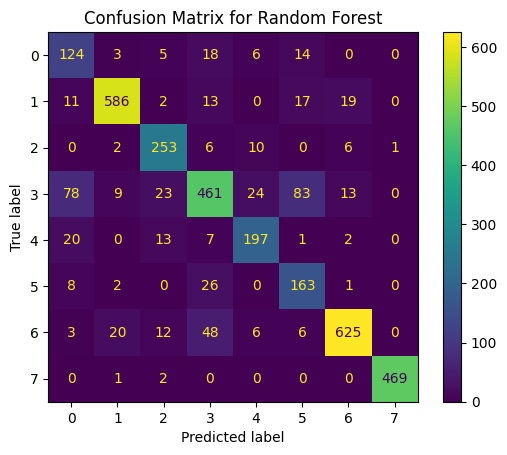

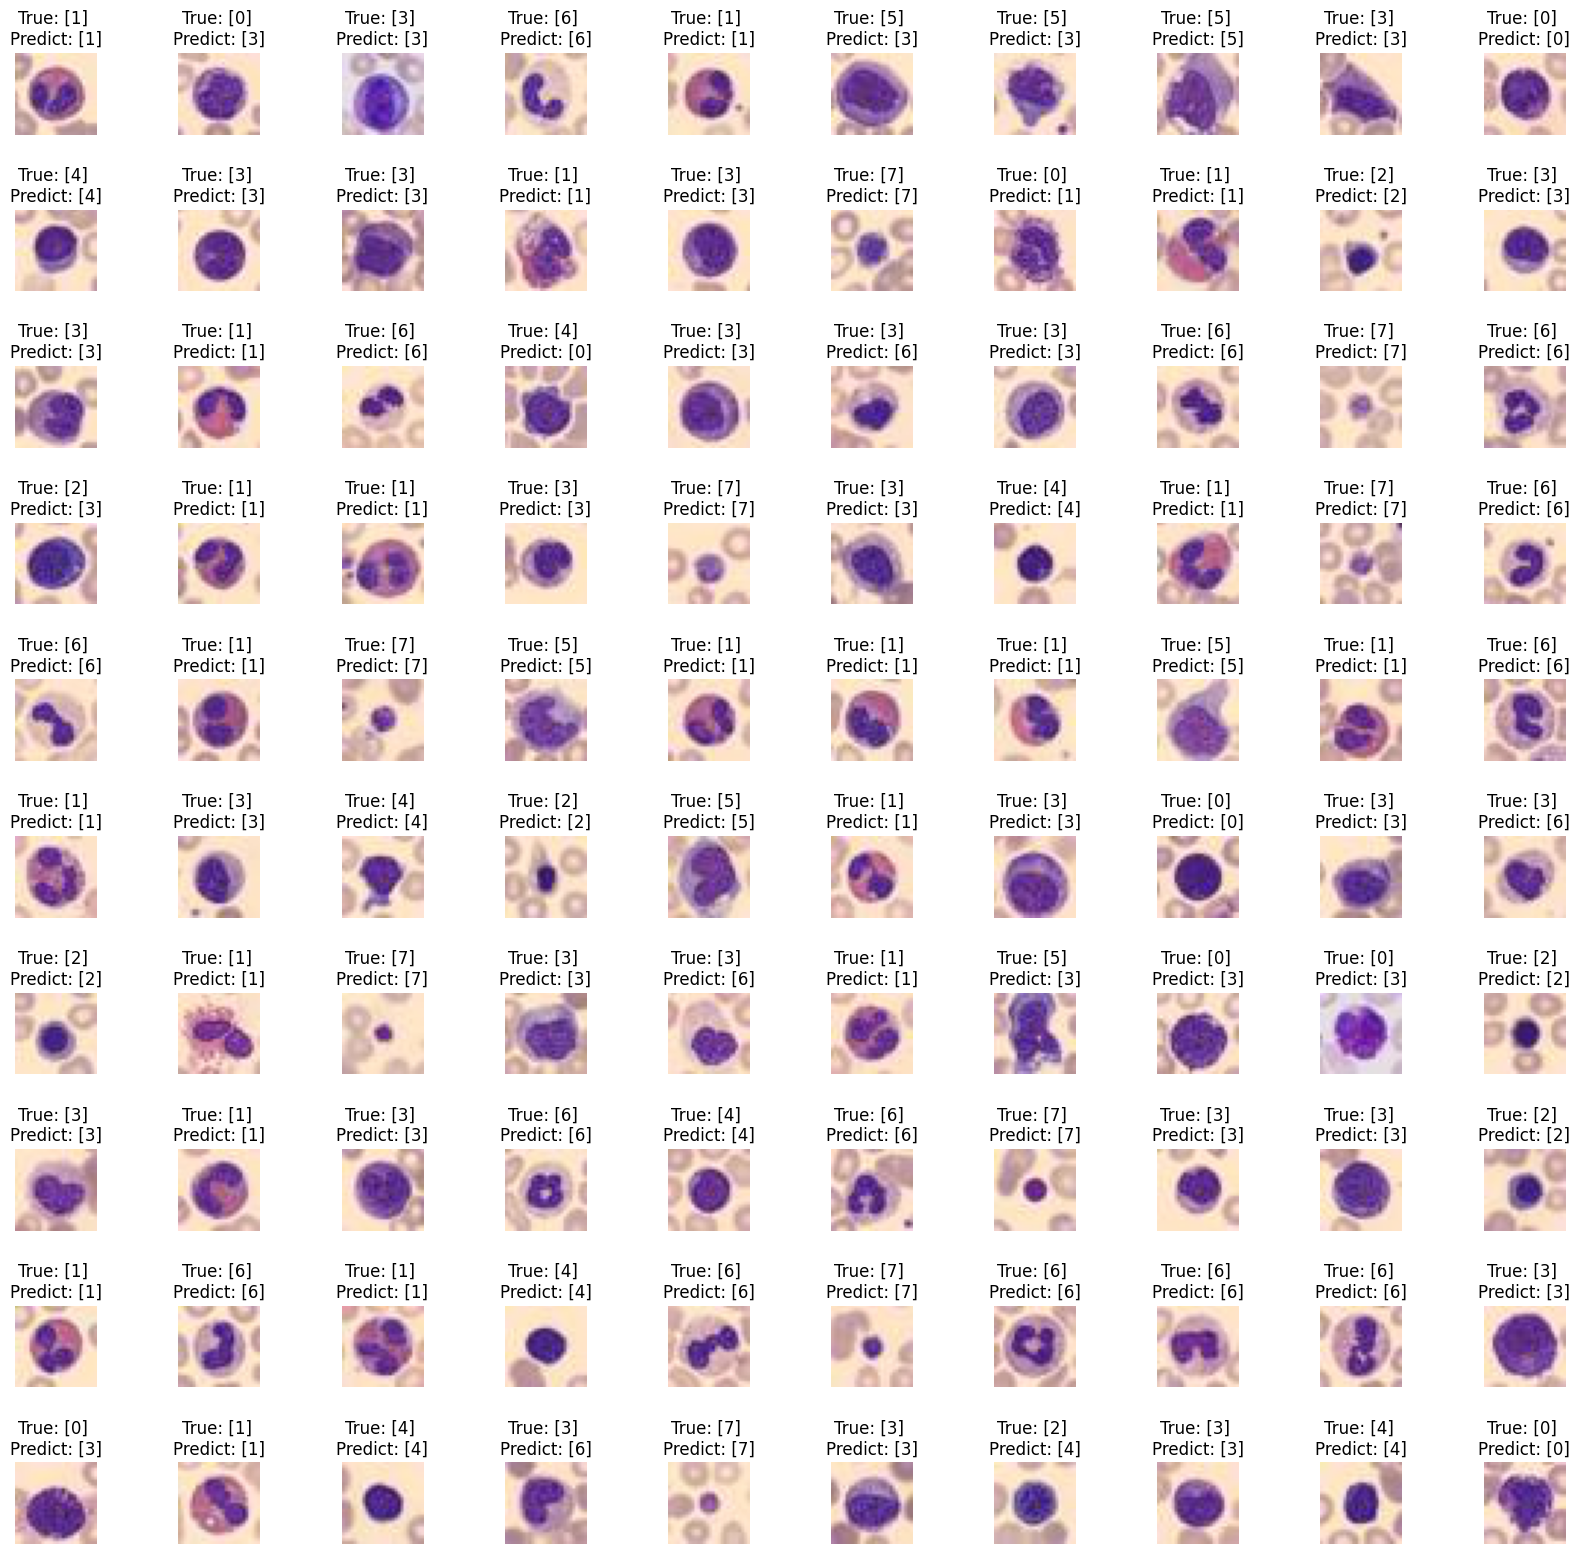

In [33]:
y_pred_rf = model_rf.predict(X_test_r_n)
accuracy_score(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))
cm = confusion_matrix(y_pred_rf,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([y_test[i]], [y_pred_rf[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)